# Part One: Theoretical parts

Considering the following equations

$$
\begin{aligned}
& \frac{\rm{d}S}{\rm{dt}} = -\beta c S I,\\
&\frac{\rm{d}I}{\rm{dt}} = \beta c S I- \gamma I,\\
&\frac{\rm{d}R}{\rm{dt}} = \gamma I,\\
&\frac{\rm{d}\ln c}{\rm{dt}} = -\theta \frac{\rm{d}\ln I}{\rm{dt}} - \delta I.
\end{aligned}
$$

Now we are going to calculate the final epidemic size.

## 1. Rewriting $c(t)$

To start with, by using
$$ I = R'/\gamma,$$
the third equation can be written as
$$\frac{\rm{d}(\ln c + \theta \ln I + \delta R /\gamma)}{dt}=0,$$
which implies
$$ \ln \left(c I^{\theta}\right)+\delta R /\gamma = \ln \left(c*0I_0^{\theta}\right)+\delta R_0 /\gamma : = M*{0}$$
i.e.,
$$c =I^{-\theta}\exp(M_0 - \delta R/\gamma).$$

Thus the equation becomes

$$
\begin{aligned}
& \frac{\rm{d}S}{\rm{dt}} = -\beta \exp(M_0 - \delta R(t)/\gamma) S I^{1-\theta},\\
&\frac{\rm{d}I}{\rm{dt}} = \beta \exp(M_0 - \delta R(t)/\gamma) S I^{1-\theta}- \gamma I,\\
&\frac{\rm{d}R}{\rm{dt}} = \gamma I.
\end{aligned}
$$

## 2. Calculate the final epidemic size

By using $ I = R'/\gamma$, the first equation becomes
$$ \frac{\rm{d}\ln S}{\rm{dt}} = -\beta \exp(M_0 - \delta R(t)/\gamma) \left(\frac{1}{\gamma}\frac{\rm{d}R}{\rm{dt}}\right)^{1-\theta}.$$

Denote the final epidemic size as $r$. It can be easily proved that
$$ S \rightarrow 1-r, \quad I \rightarrow 0, \quad R \rightarrow r$$

## 2.1. Case one: $\theta = 0.$ (Succeed)

$$ \frac{\rm{d}\ln S}{\rm{dt}} = \frac{\beta}{\delta} \left(\frac{\rm{d}\left(\exp(M_0 - \delta R(t)/\gamma)\right)}{\rm{dt}}\right),$$
which implies
$$\ln(1-r) = \frac{\beta}{\delta}\exp(M_0 - \delta r/\gamma) - \ln c_0$$

## 2.2. Case two: $\delta = 0.$ (Failed)

$$\frac{\rm{d}\ln S}{\rm{dt}} = -\beta c_0I_0^{\theta} \left(\frac{1}{\gamma}\frac{\rm{d}R}{\rm{dt}}\right)^{1-\theta}.$$
I don't know how to proceed.


# Part Two: numerical simulation

In this part, I will use the data of Ontario to fit the following model:

$$
\begin{aligned}
& \frac{\rm{d}S}{\rm{dt}} = -\beta \exp(- \alpha R) S I^{1-\theta}/N,\\
&\frac{\rm{d}I}{\rm{dt}} = \beta \exp(- \alpha R) S I^{1-\theta}?N- \gamma I,\\
&\frac{\rm{d}R}{\rm{dt}} = \gamma I.
\end{aligned}
$$

## 2.0. Setting up the Julia Environment


In [1]:
] activate .

  Activating environment at `e:\Pythonfiles\JP\ML\Para_estimation_disease_model\Project.toml`


In [2]:
# loading the Julia packages  needed.
using DifferentialEquations
using LinearAlgebra, DiffEqSensitivity, Optim
using Flux: flatten, params
using DiffEqFlux, Flux
using Plots
using Flux:train!
using GalacticOptim
using Optim
using Turing, Distributions
using MCMCChains, StatsPlots
using CSV, DataFrames
using Random
Random.seed!(14);

## 2.1. Loading the data of Ontario

From Feb 25th. Using one wave data


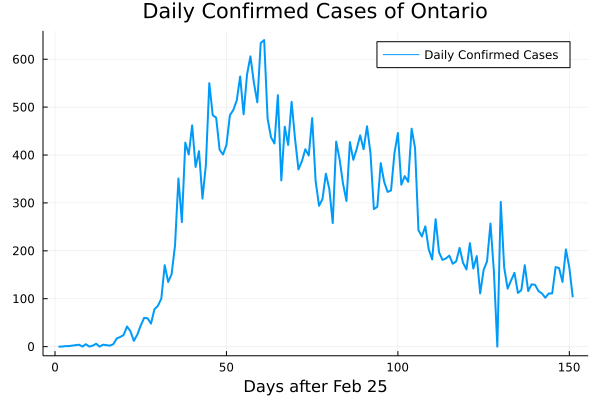

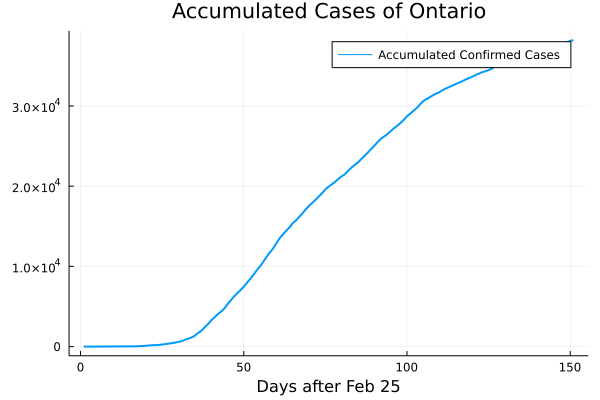

151


In [3]:
using CSV
using DataFrames
source_data = DataFrame(CSV.File("Provincial_Daily_Totals.csv"))
data_on = source_data[source_data.Province .== "ONTARIO", :]
n = 30
m = 150
data_acc = data_on.TotalCases[(n + 1):n + m + 1]
data_daily = data_on.TotalCases[(n + 1):n + m + 1] - data_on.TotalCases[n:n + m]
display(plot(data_daily, label="Daily Confirmed Cases", xlabel  = "Days after Feb 25", title = "Daily Confirmed Cases of Ontario", lw=2))
savefig("./Results_saving/Ontario_daily_cases.png")
display(plot(data_acc, label="Accumulated Confirmed Cases", xlabel  = "Days after Feb 25", title = "Accumulated Cases of Ontario", lw=2))
savefig("./Results_saving/Ontario_accumulated_cases.png")
data_daily[1]
println(length(data_acc))

In [4]:
using BSON:@save

## 2.2. Setting up the model


146.53066845459875


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciM

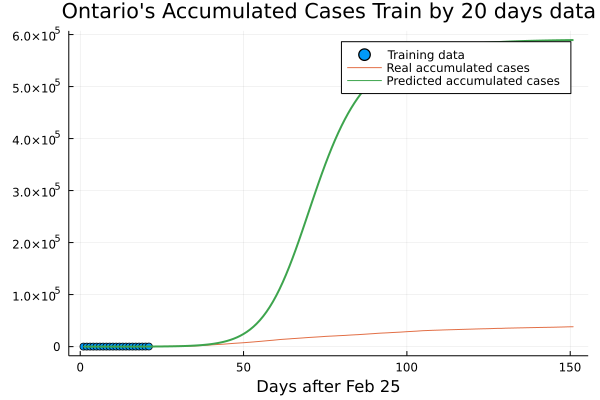

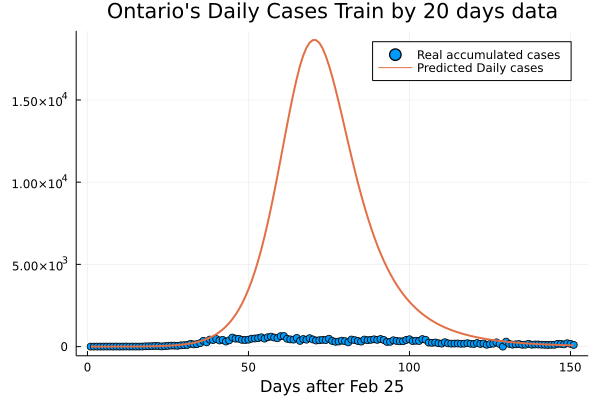

20 data parameter:[0.34907769324866283, 3.554292584743075e-6, 0.03161806154506958]

┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: NaN dt 


463.80260401136286


┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\pac

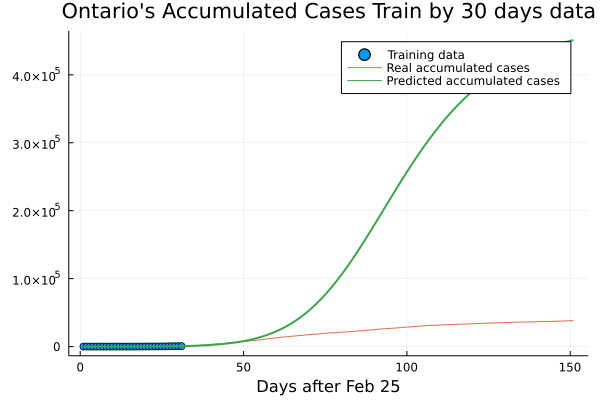

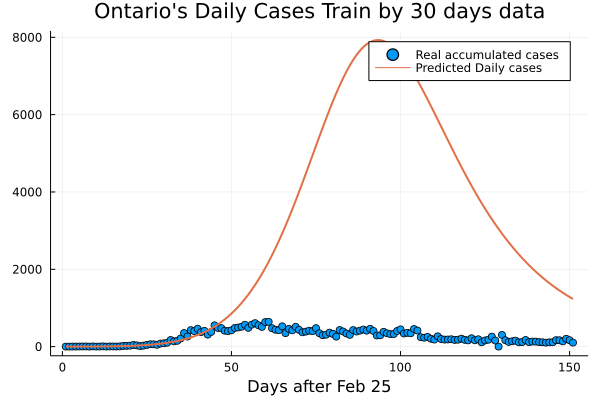

30 data parameter:[0.3849242895210631, 2.4780241434995096e-6, 0.07472006355601438]


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciM

1099.0770283555225


┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false

40 data parameter:

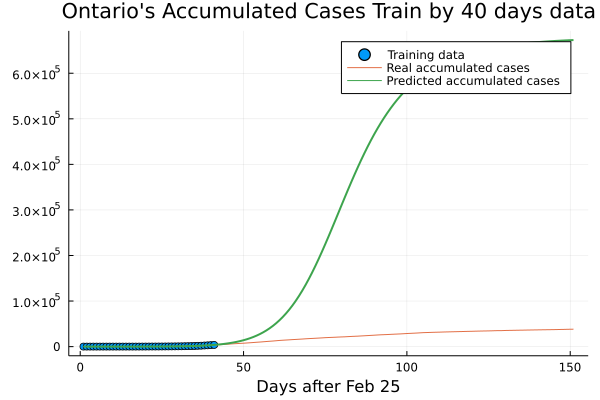

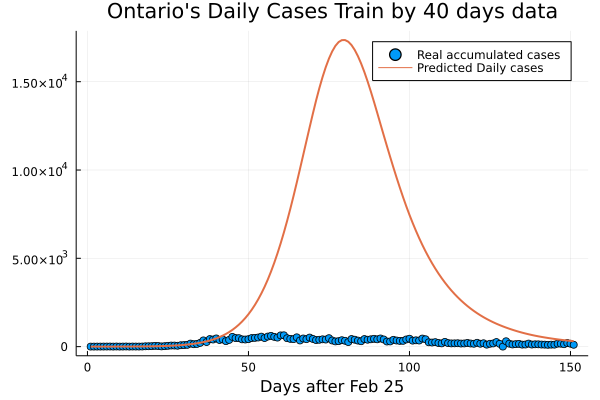

[0.34899121254410376, 2.5771267157275004e-6, 0.04219938618193208]


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciM

1926.912143485022


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The cur

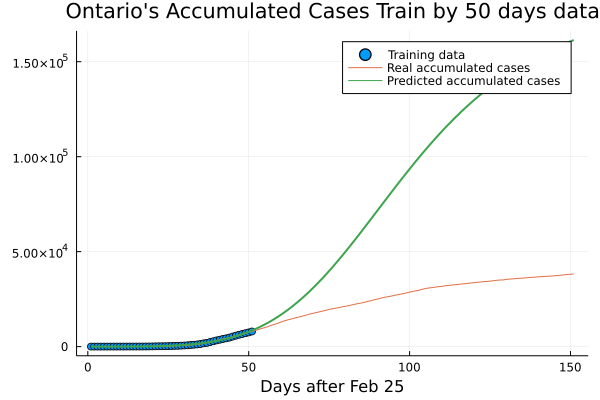

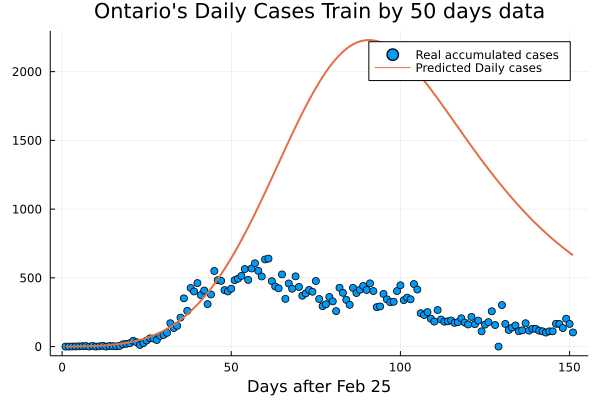

50 data parameter:[0.488715990582179, 4.988746279623106e-6, 0.1224171536124022]
2871.411440578699


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: NaN dt 

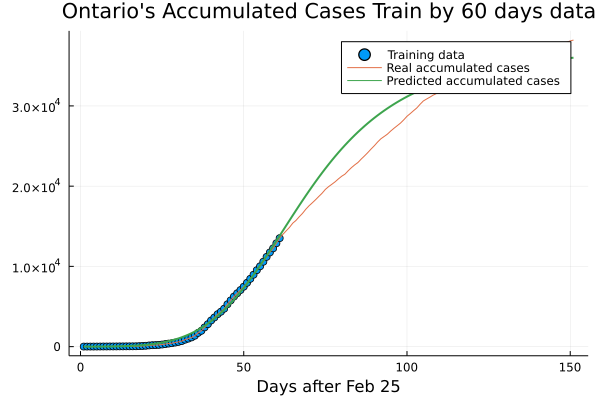

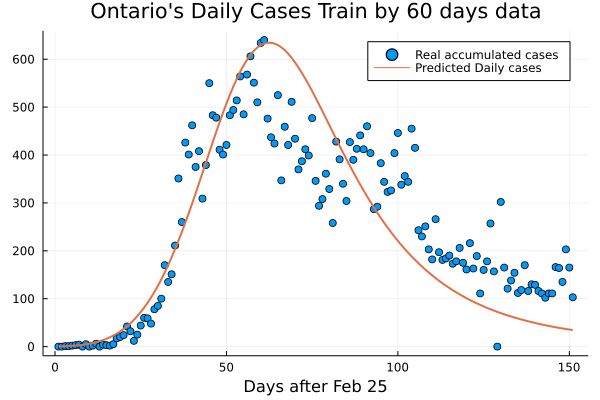

60 data parameter:[0.5226242306898267, 3.482313601444928e-5, 0.13317930032589229]


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ 

3843.6271832451303


┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.jul

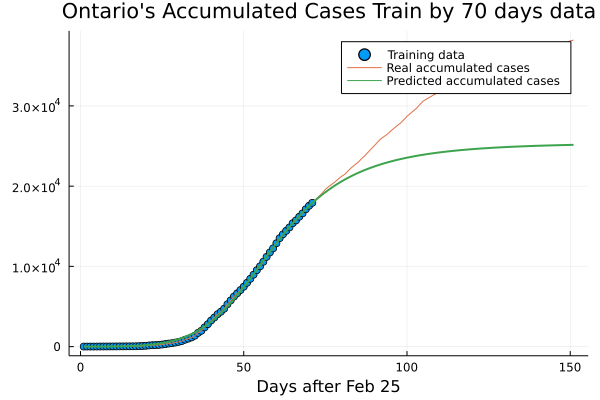

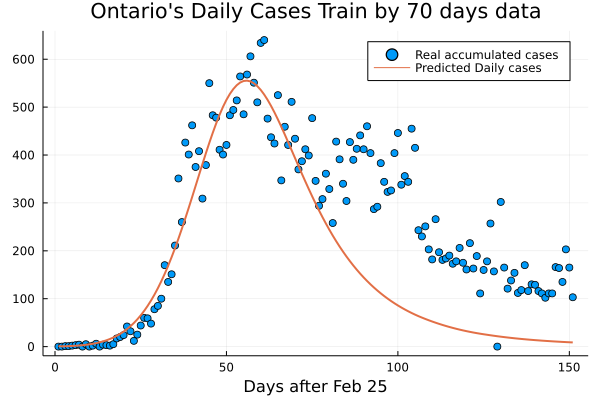

70 data parameter:[0.4677420557880401, 6.204627103875117e-5, 0.10845848092514777]

┌ Info: Found initial step size
│   ϵ = 9.765625e-5
└ @ Turing.Inference F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\Turing\uMQmD\src\inference\hmc.jl:188
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt det


4824.434403507146


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false

80 data parameter:[0.48758104755774273, 5.540224933113151e-5, 0.11730732522519768

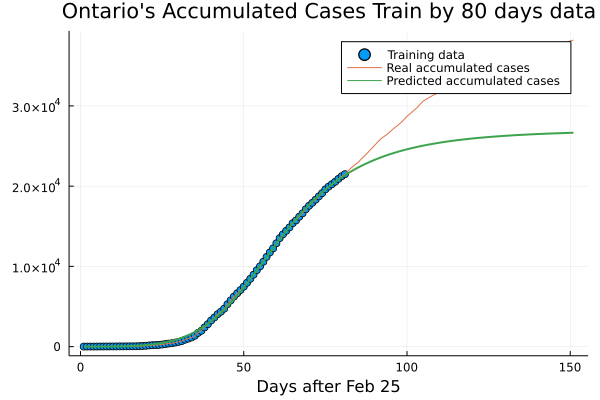

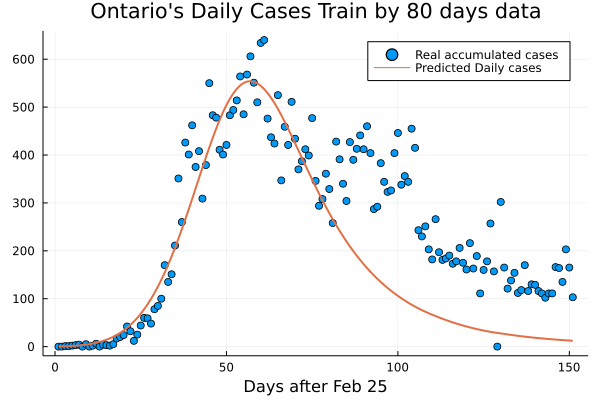

]
5845.359023826786


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: NaN dt 

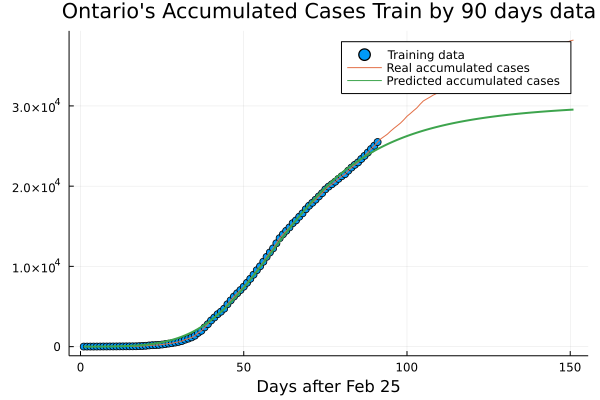

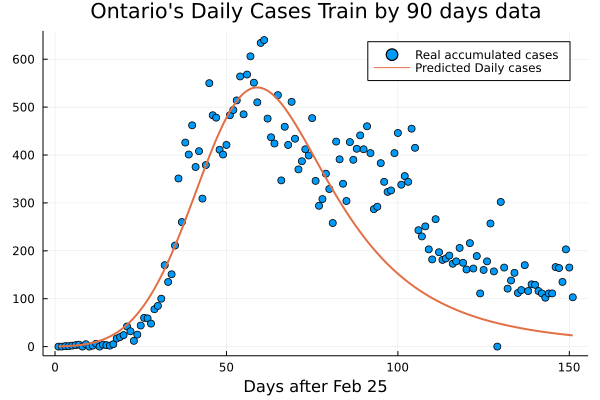

90 data parameter:[0.5382322456068839, 4.435262577895613e-5, 0.1372270821947583]
6875.14344443983


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packa

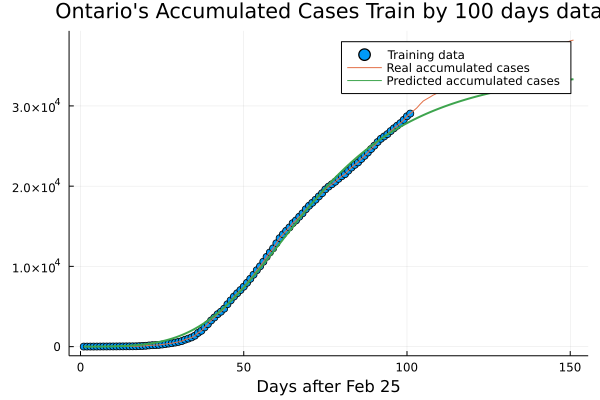

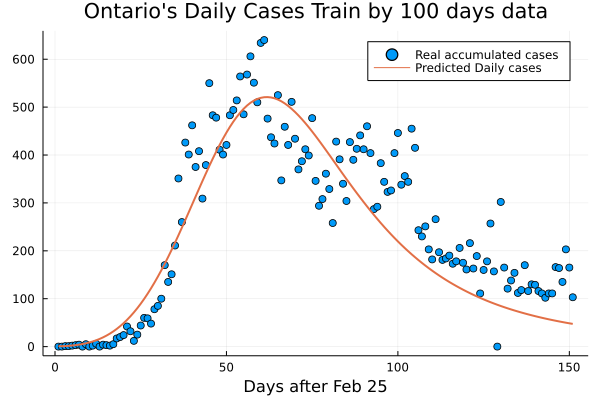

100 data parameter:[0.6187483073318611, 3.324742367761916e-5, 0.16379049095850517]


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciM

7899.538242784462


┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, caus

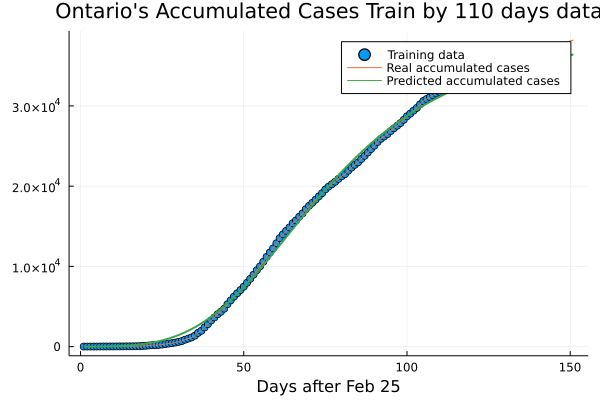

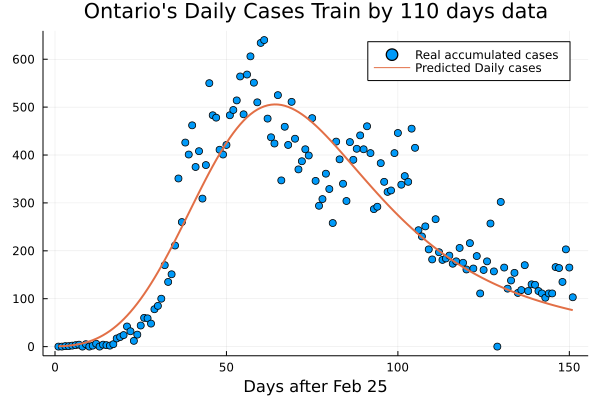

110 data parameter:[0.6939894181256607, 2.625168610186797e-5, 0.1847940169295632]
8888.621821631492


┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciMLBase\NwvCY\src\integrator_interface.jl:325
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\AdvancedHMC\yd6UP\src\hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\OrdinaryDiffEq\Zi9Zh\src\solve.jl:510
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\SciM

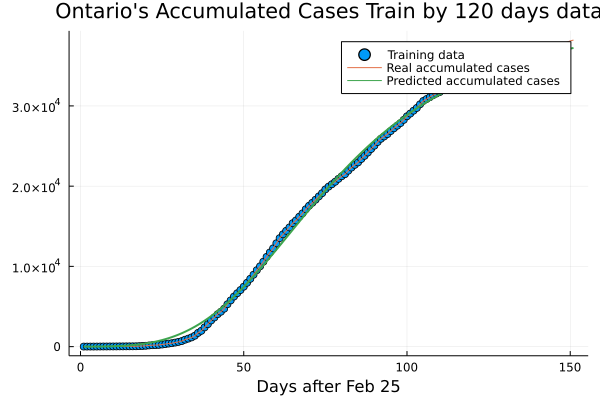

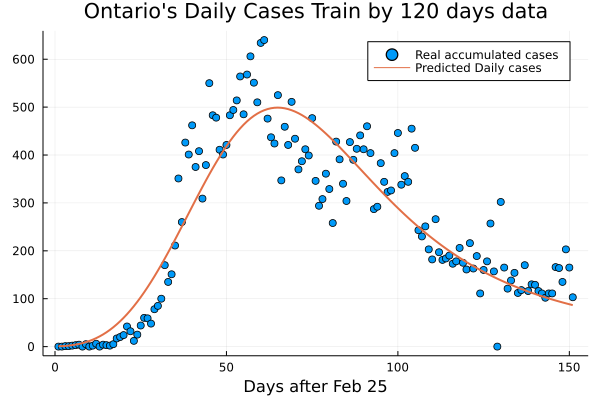

120 data parameter:[0.7224135842953888, 2.4430293586526802e-5, 0.19188674642565443]


In [7]:
# Model generation
function SIR_pred(du, u, p, t)
    β, α, θ = p
    γ = 1 / 10
    N = 14570000.0
    S, I, R, H = u
    l = 1 - θ
    du[1] = - β * S * exp(-abs(α) * R) * I^l / N
    du[2] = β * S * exp(-abs(α) * R) * I^l / N - γ * I
    du[3] = γ * I
    du[4] = β * S * exp(-abs(α) * R) * I^l / N
end
u_0 = [14570000, 1, 1, 1]

@model function fitSIR(data, prob1) # data should be a Vector
    σ ~ InverseGamma(2, 3) # ~ is the tilde character
    β ~ truncated(Normal(0.4,0.5),0,1)
    α ~ truncated(Normal(-2.799337206675763e-5,0.00001),0,1)
    θ ~ truncated(Normal(0.1,0.5),0,1)

    p = [β,α,θ]
    prob = remake(prob1, p = p)
    predicted = solve(prob, Vern7(), abstol=1e-12, reltol=1e-12, saveat=0:1:length(data)-1)

    for i = 1:length(predicted)
        data[i] ~ Normal(predicted[i][4], σ)
            # predicted[i][2] is the data for y - a scalar, so we use Normal instead of MvNormal
    end
end
# Online Learning
Time_learn  = 20:10:120
p_0 = [0.2,0.001,0.01]
for t_max = Time_learn
    tspan_learn = (0.0, t_max)
    prob_pred = ODEProblem(SIR_pred, u_0, tspan_learn, p_0)
    data_to_learn = data_acc[1:t_max+1]
    data_daily_to_learn = data_daily[1:t_max+1]
    function train(θ)
        prob_pred_train = remake(prob_pred, p = θ)
        Array(solve(prob_pred_train, Vern7(), abstol=1e-12, reltol=1e-12, saveat=0:1:t_max))
    end
    function loss(θ, p)
        pred = train(θ)
        mid = zeros(length(data_to_learn))
        mid[2:end] = pred[4,1:end - 1]
        pred_daily = pred[4,:] - mid
        sum(abs2, (log.(data_to_learn) .- log.(pred[4,:]))) + sum(abs2, (log.(data_daily_to_learn .+ 1) .- log.(pred_daily .+ 1))) # + 1e-5*sum(sum.(abs, params(ann)))
    end
    println(loss([0.3,0.3,0.3], p_0))
    lb = [0.0001, 0.000001, 0.000001]
    ub = [1,1,1]
    using GalacticOptim:OptimizationProblem
    using Optim
    loss1 = OptimizationFunction(loss, GalacticOptim.AutoForwardDiff())
    prob = OptimizationProblem(loss1, p_0, lb=lb, ub=ub)
    sol1 = GalacticOptim.solve(prob, NelderMead(), maxiters=1000)
    p_min = sol1.u
    #p_0 = p_min
    """
    tspan_predict = (0.0, 150)
    scatter(data_acc,label="Real accumulated cases $t_max")
    prob_prediction = ODEProblem(SIR_pred, u_0, tspan_predict, p_min)
    data_prediction = Array(solve(prob_prediction, Tsit5(), saveat=1))
    display(plot!(data_prediction[4,:],label="Fit accumulated cases $t_max"))
    mid = zeros(length(data_acc))
    mid[2:end] = data_prediction[4,1:end - 1]
    pred_daily = data_prediction[4,:] - mid
    scatter(data_daily,label="Real accumulated cases $t_max")
    display(plot!(pred_daily,label="Fit daily $t_max"))
    """
    Turing.setadbackend(:forwarddiff)
    model = fitSIR(data_to_learn, prob_pred)
    chain = sample(model, NUTS(.45), MCMCThreads(), 2000, 3, progress=false, init_theta = sol1.u)
    @save "chain_day$t_max.bason"
    p_min = [mean(chain[:β]),mean(chain[:α]),mean(chain[:θ])]
    println("$t_max data parameter:",p_min)
    p_0 = p_min
    tspan_predict = (0.0, 150)
    scatter(data_to_learn,label="Training data")
    plot!(data_acc,label="Real accumulated cases")
    prob_prediction = ODEProblem(SIR_pred, u_0, tspan_predict, p_min)
    data_prediction = Array(solve(prob_prediction, Tsit5(), saveat=1))
    display(plot!(data_prediction[4,:],label="Predicted accumulated cases",xlabel  = "Days after Feb 25", title = "Ontario's Accumulated Cases Train by $t_max days data", lw=2))
    savefig("./Results_saving/Fit_Ontario_accumulated_cases_by$t_max.png")
    mid = zeros(length(data_acc))
    mid[2:end] = data_prediction[4,1:end - 1]
    pred_daily = data_prediction[4,:] - mid
    scatter(data_daily,label="Real accumulated cases")
    display(plot!(pred_daily,label="Predicted Daily cases", xlabel  = "Days after Feb 25", title = "Ontario's Daily Cases Train by $t_max days data", lw=2))
    savefig("./Results_saving/Fit_Ontario_daily_cases_by$t_max.png")
end



